# Before you begin


1.   Use the [Cloud Resource Manager](https://console.cloud.google.com/cloud-resource-manager) to Create a Cloud Platform project if you do not already have one.
2.   [Enable billing](https://support.google.com/cloud/answer/6293499#enable-billing) for the project.
3.   [Enable BigQuery](https://console.cloud.google.com/flows/enableapi?apiid=bigquery) APIs for the project.


### Provide your credentials to the runtime

In [1]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


## Optional: Enable data table display

Colab includes the ``google.colab.data_table`` package that can be used to display large pandas dataframes as an interactive data table.
It can be enabled with:

In [0]:
%load_ext google.colab.data_table

If you would prefer to return to the classic Pandas dataframe display, you can disable this by running:
```python
%unload_ext google.colab.data_table
```

# Use BigQuery via magics

The `google.cloud.bigquery` library also includes a magic command which runs a query and either displays the result or saves it to a variable as a `DataFrame`.

## as shown below, if after project if "df" is written, it turns the query into a pandas dataframe

In [0]:
# %%bigquery --project yourprojectid

%%bigquery --project <*********> df

SELECT 
*

FROM `<*********>.****_Google_Ads.p_HourlyCampaignConversionStats_8018601813` 

In [0]:
# this is for the final print of results
table= "****_Google_Ads.p_HourlyCampaignConversionStats_8018601813"

# Useful links
https://github.com/albertovpd/datamad1019/blob/lab-supervised-learning/module-3/lab-supervised-learning/your-code/main.ipynb
https://github.com/albertovpd/kaggle-competitions

# Save output in a variable `df`

%%bigquery --project yourprojectid df 
SELECT 
  COUNT(*) as total_rows
FROM `bigquery-public-data.samples.gsod`

In [5]:
df.head()

,BaseCampaignId,CampaignGroupId,CampaignId,ConversionTrackerId,ExternalCustomerId,AdNetworkType1,AdNetworkType2,ClickType,ConversionAttributionEventType,ConversionCategoryName,ConversionRate,ConversionTypeName,ConversionValue,Conversions,CostPerConversion,Date,DayOfWeek,Device,HourOfDay,Month,MonthOfYear,Quarter,ValuePerConversion,Week,Year
0,8766085130,0,8766085130,253146701,8018601813,SEARCH,SEARCH,URL_CLICKS,INTERACTION,Other,0.0,WOOM - Ovulación y Fertilidad (iOS) session_start,0.0,0.0,0,2020-01-30,THURSDAY,HIGH_END_MOBILE,2,2020-01-01,JANUARY,2020-01-01,0.0,2020-01-27,2020
1,8766085130,0,8766085130,253146701,8018601813,SEARCH,SEARCH,URL_CLICKS,INTERACTION,Other,0.0,WOOM - Ovulación y Fertilidad (iOS) session_start,0.0,0.0,0,2020-01-30,THURSDAY,HIGH_END_MOBILE,3,2020-01-01,JANUARY,2020-01-01,0.0,2020-01-27,2020
2,8766085130,0,8766085130,253146701,8018601813,SEARCH,SEARCH,URL_CLICKS,INTERACTION,Other,0.0,WOOM - Ovulación y Fertilidad (iOS) session_start,0.0,0.0,0,2020-01-30,THURSDAY,HIGH_END_MOBILE,1,2020-01-01,JANUARY,2020-01-01,0.0,2020-01-27,2020
3,8766085142,0,8766085142,253146701,8018601813,SEARCH,SEARCH,URL_CLICKS,INTERACTION,Other,0.0,WOOM - Ovulación y Fertilidad (iOS) session_start,0.0,0.0,0,2020-01-30,THURSDAY,HIGH_END_MOBILE,1,2020-01-01,JANUARY,2020-01-01,0.0,2020-01-27,2020
4,8770486283,0,8770486283,253146701,8018601813,SEARCH,SEARCH,URL_CLICKS,INTERACTION,Other,0.0,WOOM - Ovulación y Fertilidad (iOS) session_start,0.0,0.0,0,2020-01-30,THURSDAY,HIGH_END_MOBILE,5,2020-01-01,JANUARY,2020-01-01,0.0,2020-01-27,2020


In [6]:
df.dtypes

BaseCampaignId                      int64
CampaignGroupId                     int64
CampaignId                          int64
ConversionTrackerId                 int64
ExternalCustomerId                  int64
AdNetworkType1                     object
AdNetworkType2                     object
ClickType                          object
ConversionAttributionEventType     object
ConversionCategoryName             object
ConversionRate                    float64
ConversionTypeName                 object
ConversionValue                   float64
Conversions                       float64
CostPerConversion                   int64
Date                               object
DayOfWeek                          object
Device                             object
HourOfDay                           int64
Month                              object
MonthOfYear                        object
Quarter                            object
ValuePerConversion                float64
Week                              

In [0]:
# we need to get rid of all object types
# first, evaluate what columns are strongly correlated

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

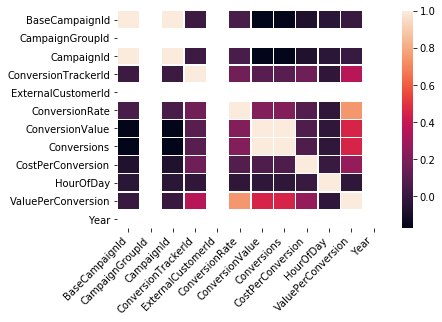

In [9]:
# IMP! _get_numeric_data() is awesome

corr = df._get_numeric_data().corr()
# ------
ax = sns.heatmap(
    corr, 
    linewidths=.5
    
    #vmin=-1, vmax=1, center=0,
    #cmap=sns.diverging_palette(20, 220, n=200),
    #square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
sns.set(rc={'figure.figsize':(15,15)})
ax

In [0]:
# remove column collinearity
# # Note that you should remove as few columns as you can. You don't have to remove all the columns at once. But instead, try removing one column, then produce the heatmap 
# again to determine if additional columns should be removed. As long as the dataset no longer contains columns that are correlated for over 90%, you can stop. Also, keep 
# in mind when two columns have high collinearity, you only need to remove one of them but not both.

In [11]:
df.columns

Index(['BaseCampaignId', 'CampaignGroupId', 'CampaignId',
       'ConversionTrackerId', 'ExternalCustomerId', 'AdNetworkType1',
       'AdNetworkType2', 'ClickType', 'ConversionAttributionEventType',
       'ConversionCategoryName', 'ConversionRate', 'ConversionTypeName',
       'ConversionValue', 'Conversions', 'CostPerConversion', 'Date',
       'DayOfWeek', 'Device', 'HourOfDay', 'Month', 'MonthOfYear', 'Quarter',
       'ValuePerConversion', 'Week', 'Year'],
      dtype='object')

In [0]:
df.drop(['CampaignGroupId','ExternalCustomerId','BaseCampaignId',"Conversions"], axis=1, inplace=True)

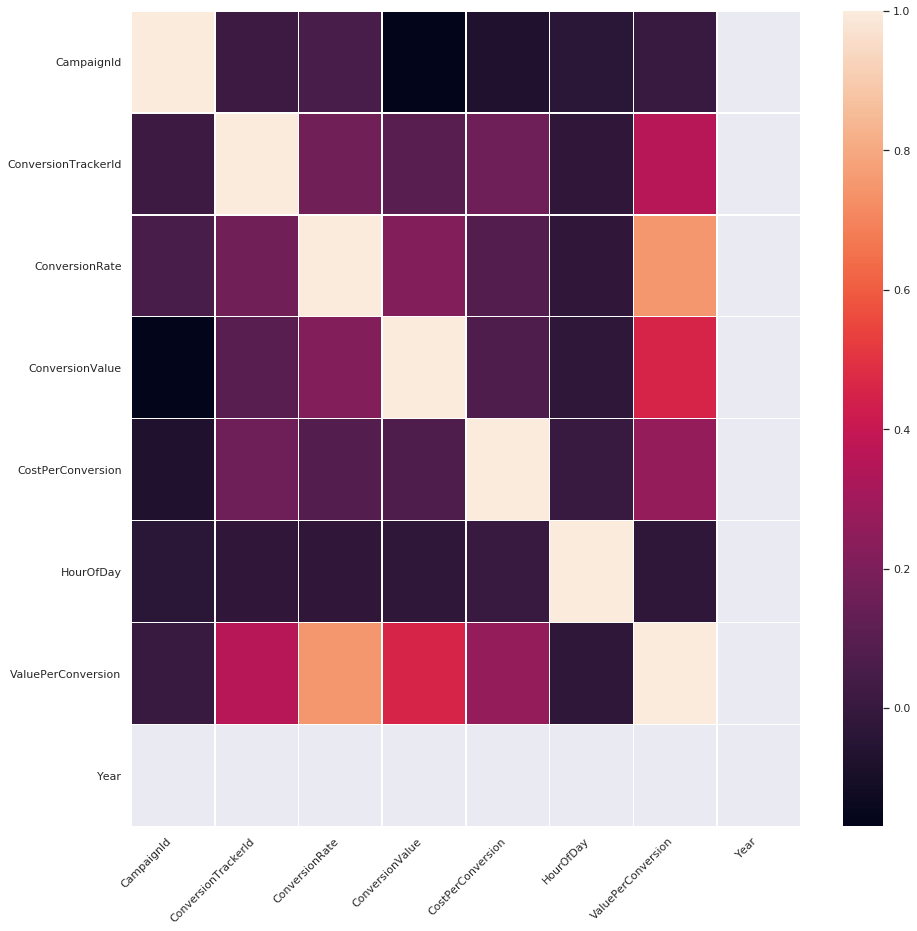

In [13]:
corr = df._get_numeric_data().corr()
# ------
ax = sns.heatmap(
    corr, 
    linewidths=.5
    
    #vmin=-1, vmax=1, center=0,
    #cmap=sns.diverging_palette(20, 220, n=200),
    #square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
sns.set(rc={'figure.figsize':(10,10)})
ax

In [14]:
# handle missing values
df.isna().sum() # the less the better

CampaignId                        0
ConversionTrackerId               0
AdNetworkType1                    0
AdNetworkType2                    0
ClickType                         0
ConversionAttributionEventType    0
ConversionCategoryName            0
ConversionRate                    0
ConversionTypeName                0
ConversionValue                   0
CostPerConversion                 0
Date                              0
DayOfWeek                         0
Device                            0
HourOfDay                         0
Month                             0
MonthOfYear                       0
Quarter                           0
ValuePerConversion                0
Week                              0
Year                              0
dtype: int64

In [0]:
# handle date

In [16]:
df.DayOfWeek.value_counts()

SUNDAY       5882
MONDAY       5556
SATURDAY     5446
FRIDAY       4277
THURSDAY     4094
WEDNESDAY    3672
TUESDAY      3246
Name: DayOfWeek, dtype: int64

In [0]:
cleanup_nums={"DayOfWeek": {"MONDAY":1,"TUESDAY":2,"WEDNESDAY":3,"THURSDAY":4,"FRIDAY":5,"SATURDAY":6,"SUNDAY":7}}
df.replace(cleanup_nums, inplace=True)

In [0]:
for e in df.columns:
  if e == 'Month' or e== "Quarter" or e=="Week":
    df.drop([e], axis=1, inplace=True)

In [19]:
df.columns

Index(['CampaignId', 'ConversionTrackerId', 'AdNetworkType1', 'AdNetworkType2',
       'ClickType', 'ConversionAttributionEventType', 'ConversionCategoryName',
       'ConversionRate', 'ConversionTypeName', 'ConversionValue',
       'CostPerConversion', 'Date', 'DayOfWeek', 'Device', 'HourOfDay',
       'MonthOfYear', 'ValuePerConversion', 'Year'],
      dtype='object')

In [20]:
df.Date.value_counts()
# year 2020 todo, 

2020-02-23    1368
2020-03-02    1354
2020-02-21    1291
2020-02-22    1289
2020-02-17    1219
2020-02-18    1169
2020-02-16    1122
2020-03-01    1118
2020-02-20    1115
2020-02-15    1100
2020-02-19    1070
2020-01-25    1014
2020-02-03    1007
2020-02-02     981
2020-01-23     979
2020-02-14     958
2020-02-01     951
2020-01-24     945
2020-01-26     926
2020-02-24     899
2020-01-22     893
2020-02-13     863
2020-02-04     758
2020-02-29     664
2020-01-27     626
2020-02-27     615
2020-02-12     582
2020-02-26     576
2020-02-11     498
2020-02-25     481
2020-02-10     451
2020-02-28     445
2020-02-07     430
2020-02-08     428
2020-02-06     397
2020-02-09     367
2020-02-05     360
2020-01-28     340
2020-01-31     208
2020-01-29     191
2020-01-30     125
Name: Date, dtype: int64

In [0]:
# we need to split this between months and days. the year is always the same
# #pandas datetimeindex docs: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DatetimeIndex.html
#efficient way to extract year from string format date
import datetime

In [0]:
#pandas datetimeindex docs: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DatetimeIndex.html
df["month"]=pd.DatetimeIndex(df.Date).month

In [0]:
df["day"]=pd.DatetimeIndex(df.Date).day

In [0]:
# now we remove the unnecessary columns about dates
df.drop(["MonthOfYear", "Date"], axis=1, inplace=True)

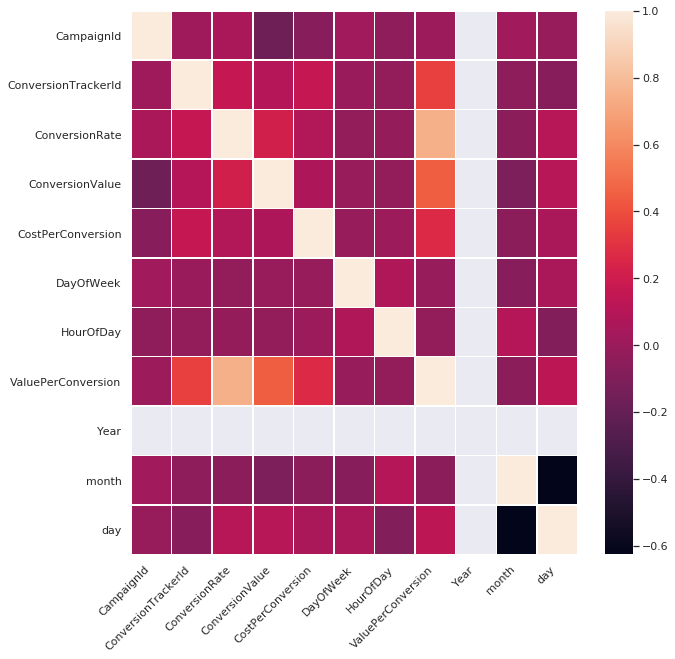

In [25]:
# final check to the correlation matrix
corr = df._get_numeric_data().corr()
# ------
ax = sns.heatmap(
    corr, 
    linewidths=.5
    
    #vmin=-1, vmax=1, center=0,
    #cmap=sns.diverging_palette(20, 220, n=200),
    #square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
sns.set(rc={'figure.figsize':(10,10)})
ax

In [0]:
# awesome. we'll remove year because all is in 2020, it's useless
df.drop(["Year"], axis=1, inplace=True)

In [0]:
df.drop(["ClickType"],axis=1, inplace = True)
# just 1 kind of clicktype

In [0]:
# handle categorical data

In [29]:
df.dtypes

CampaignId                          int64
ConversionTrackerId                 int64
AdNetworkType1                     object
AdNetworkType2                     object
ConversionAttributionEventType     object
ConversionCategoryName             object
ConversionRate                    float64
ConversionTypeName                 object
ConversionValue                   float64
CostPerConversion                   int64
DayOfWeek                           int64
Device                             object
HourOfDay                           int64
ValuePerConversion                float64
month                               int64
day                                 int64
dtype: object

In [0]:
# categorical_to_numerical={}
# convert to number based on frequency (high frequency - high number):
for e in df.select_dtypes(include=['object']):
  labels = df[e].value_counts(ascending=True).index.tolist()
  codes = range(1,len(labels)+1)
  df[e].replace(labels,codes,inplace=True)


In [31]:
# awesome, all is numerical now
df.head()

,CampaignId,ConversionTrackerId,AdNetworkType1,AdNetworkType2,ConversionAttributionEventType,ConversionCategoryName,ConversionRate,ConversionTypeName,ConversionValue,CostPerConversion,DayOfWeek,Device,HourOfDay,ValuePerConversion,month,day
0,8766085130,253146701,2,3,2,2,0.0,5,0.0,0,4,2,2,0.0,1,30
1,8766085130,253146701,2,3,2,2,0.0,5,0.0,0,4,2,3,0.0,1,30
2,8766085130,253146701,2,3,2,2,0.0,5,0.0,0,4,2,1,0.0,1,30
3,8766085142,253146701,2,3,2,2,0.0,5,0.0,0,4,2,1,0.0,1,30
4,8770486283,253146701,2,3,2,2,0.0,5,0.0,0,4,2,5,0.0,1,30


In [32]:
# OUTLIERS OUT TIME

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

CampaignId                        7.042990e+09
ConversionTrackerId               1.334496e+08
AdNetworkType1                    1.000000e+00
AdNetworkType2                    1.000000e+00
ConversionAttributionEventType    0.000000e+00
ConversionCategoryName            1.000000e+00
ConversionRate                    2.857000e-01
ConversionTypeName                3.000000e+00
ConversionValue                   2.000000e+00
CostPerConversion                 1.566670e+05
DayOfWeek                         4.000000e+00
Device                            0.000000e+00
HourOfDay                         1.300000e+01
ValuePerConversion                1.000000e+00
month                             0.000000e+00
day                               1.500000e+01
dtype: float64


In [33]:
df.shape

(32173, 16)

In [34]:
# removing outliers with The interquartile range (IQR)
# https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(16392, 16)

In [0]:
# MACHINE LEARNING TIME

In [36]:
# split dataframe
df.columns

Index(['CampaignId', 'ConversionTrackerId', 'AdNetworkType1', 'AdNetworkType2',
       'ConversionAttributionEventType', 'ConversionCategoryName',
       'ConversionRate', 'ConversionTypeName', 'ConversionValue',
       'CostPerConversion', 'DayOfWeek', 'Device', 'HourOfDay',
       'ValuePerConversion', 'month', 'day'],
      dtype='object')

In [0]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor #HistGradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

In [0]:
y=df["ConversionRate"]
X=df[['CampaignId', 'ConversionTrackerId', 'AdNetworkType1', 'AdNetworkType2',
       'ConversionAttributionEventType', 'ConversionCategoryName',
        'ConversionTypeName', 'ConversionValue',
       'CostPerConversion', 'DayOfWeek', 'Device', 'HourOfDay',
       'ValuePerConversion', 'month', 'day']]

In [0]:
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [0]:
# standarizing
scaler =StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# sc = StandardScaler()
# X = sc.fit_transform(X)

In [0]:
# funtion to plot metrics
def results_algo(dictio,X_test,y_test):
    
    '''it receives a dicitonary with name and 
    features of the model '''
    
    for n,e in dictio.items():
        score=e.score(X_test,y_test)
        prediction = e.predict(X_test)

        print(str(e))
        print(table)
        print("Mean Absolute Error: ", mean_absolute_error(y_test, prediction)) 
        print('Root mean Squared Error is:', mean_squared_error(y_test, prediction)**0.5)
        print('R2 square value: ', r2_score(y_test, prediction))
        #print("Accuracy Score", accuracy_score(y_test, prediction))
        plt.figure(figsize= (6, 6))
        plt.title(n)
        sns.regplot(prediction, y_test)
        plt.xlabel('Predicted Conversion Rate')
        plt.ylabel('Conversion Rate')
        plt.show()
        print("")

In [0]:

algo_dict={"y_gbr": GradientBoostingRegressor(n_estimators=1000).fit(X_train, y_train),
          "y_gbr2":GradientBoostingRegressor(n_estimators=2000).fit(X_train, y_train),
          "y_gbr3":GradientBoostingRegressor(n_estimators=3000).fit(X_train, y_train),
            "y_random":RandomForestRegressor(n_estimators=150).fit(X_train,y_train),
            "y_random2":RandomForestRegressor(n_estimators=300).fit(X_train,y_train),
            "y_random3":RandomForestRegressor(n_estimators=400).fit(X_train,y_train),
            "y_random4":RandomForestRegressor(n_estimators=550).fit(X_train,y_train),
           
          }

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=1000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
W***_Google_Ads.p_HourlyCampaignConversionStats_8018601813
Mean Absolute Error:  0.013604690531316728
Root mean Squared Error is: 0.03974503138135493
R2 square value:  0.9292184311450951


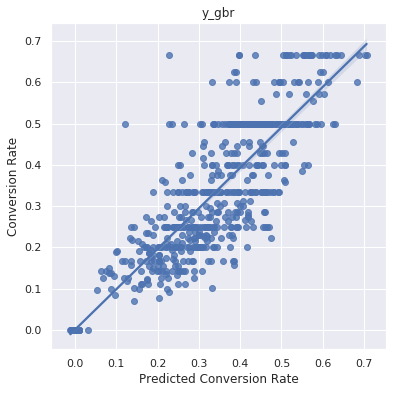


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=2000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
W***_Google_Ads.p_HourlyCampaignConversionStats_8018601813
Mean Absolute Error:  0.013807103865088273
Root mean Squared Error is: 0.04067537543352155
R2 square value:  0.9258659654143611


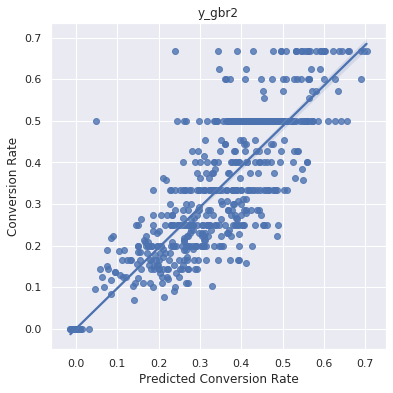


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=3000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
W***_Google_Ads.p_HourlyCampaignConversionStats_8018601813
Mean Absolute Error:  0.013904919856267581
Root mean Squared Error is: 0.04155341549151123
R2 square value:  0.9226308280151394


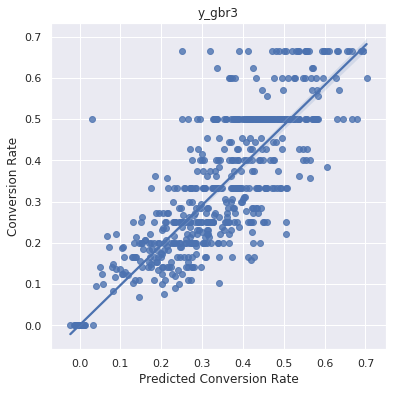


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=150, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
W***_Google_Ads.p_HourlyCampaignConversionStats_8018601813
Mean Absolute Error:  0.01429074209616753
Root mean Squared Error is: 0.04377146876456679
R2 square value:  0.9141507045255314


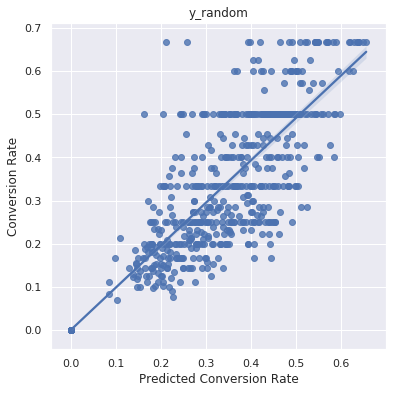


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
W***_Google_Ads.p_HourlyCampaignConversionStats_8018601813
Mean Absolute Error:  0.014283444105587758
Root mean Squared Error is: 0.04371808011273183
R2 square value:  0.9143599998985916


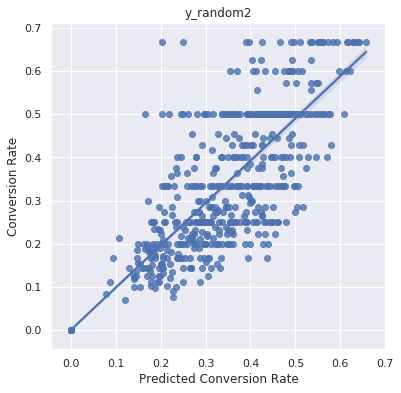


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=400, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
W***_Google_Ads.p_HourlyCampaignConversionStats_8018601813
Mean Absolute Error:  0.014252640751390528
Root mean Squared Error is: 0.04358566039485977
R2 square value:  0.9148780121193495


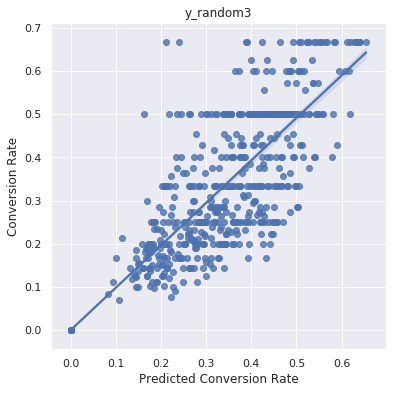


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=550, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
W***_Google_Ads.p_HourlyCampaignConversionStats_8018601813
Mean Absolute Error:  0.014245319249216775
Root mean Squared Error is: 0.043658838856541406
R2 square value:  0.9145919398072613


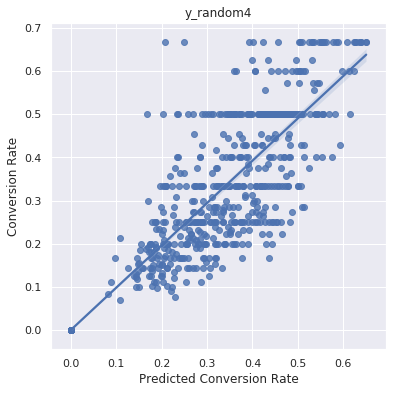

In [44]:
results_algo(algo_dict,X_test,y_test)